In [10]:
# julia version of stability lp tester

using JuMP
using Ipopt

function run_trial(m,w)

    # Define the LP model
    model = Model(Ipopt.Optimizer)

    alpha = 2 * minimum(w) # UPDATE THIS
    B = alpha / log(m)


    @variable(model, x[1:m] >= 0)

    @constraint(model, sum(x) >= 1)

    # the following function takes a vector of variables, x, and a vector
    # of nonnegative weights, w, and returns the weighted entropy, defined to be
    # sum w_i x_i log(1 / w_i x_i)
    function entropy(x, w)
        return sum([w[i] * x[i] * log(alpha / (w[i] * x[i])) / alpha for i in 1:length(x)])
    end

    function set_cover_objective(x,w)
        return sum([w[i] * x[i] for i in 1:length(x)])
    end

    @constraint(model, set_cover_objective(x, w) <= alpha)

    # Define the objective function
    @objective(model, Max, set_cover_objective(x, w) - B * entropy(x, w))

    # Solve the LP problem
    optimize!(model)

    print(m)

    return value(x[1]),x
end

delta0 = 0.001 

ms = 10:1:30

unif(m) = [1/m for i in 1:m]
function perturbed(m)
    w = unif(m)
    w[1] -= delta0 
    return w
end

results = [abs(run_trial(m, unif(m))[1] - run_trial(m, perturbed(m)))[1] / (delta0) for m in ms]




This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       20
Number of nonzeros in Lagrangian Hessian.............:       10

Total number of variables............................:       10
                     variables with only lower bounds:       10
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.3010291e-02 9.00e-01 1.71e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

MethodError: MethodError: no method matching -(::Float64, ::Tuple{Float64, Vector{VariableRef}})

Closest candidates are:
  -(::Real, !Matched::Complex{Bool})
   @ Base complex.jl:321
  -(!Matched::MutableArithmetics.Zero, ::Any)
   @ MutableArithmetics ~/.julia/packages/MutableArithmetics/iovKe/src/rewrite.jl:67
  -(::Any, !Matched::MutableArithmetics.Zero)
   @ MutableArithmetics ~/.julia/packages/MutableArithmetics/iovKe/src/rewrite.jl:68
  ...


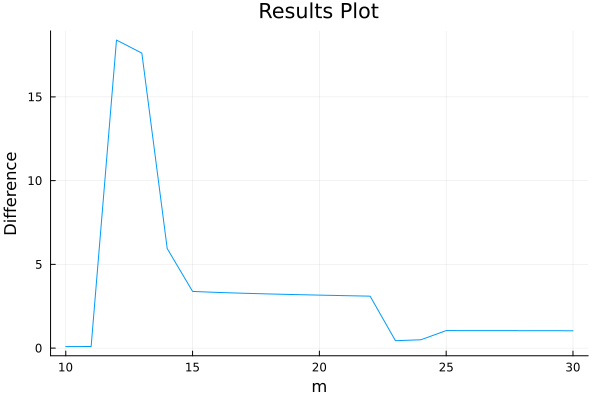

In [17]:
x1, x = run_trial(13, perturbed(13))


This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       26
Number of nonzeros in Lagrangian Hessian.............:       13

Total number of variables............................:       13
                     variables with only lower bounds:       13
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0598861e-02 8.70e-01 1.78e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

0.07592307692307693

In [14]:
value.(x)

13-element Vector{Float64}:
 0.16351997227653203
 0.14265341392471947
 0.14265341392471945
 0.14265341392471956
 0.14265341392471956
 0.14265341392471956
 0.14265341392471956
 0.14265341392471956
 0.14265341392471956
 0.14265341392471956
 0.14265341392471956
 0.14265341392471947
 0.14265341392471947

In [16]:
[1/m for m in ms]

21-element Vector{Float64}:
 0.1
 0.09090909090909091
 0.08333333333333333
 0.07692307692307693
 0.07142857142857142
 0.06666666666666667
 0.0625
 0.058823529411764705
 0.05555555555555555
 0.05263157894736842
 ⋮
 0.045454545454545456
 0.043478260869565216
 0.041666666666666664
 0.04
 0.038461538461538464
 0.037037037037037035
 0.03571428571428571
 0.034482758620689655
 0.03333333333333333

In [18]:
minimum(perturbed(13))

0.07592307692307693